In [93]:
# from variable500grid import *
# from variable2000grid50sensor import*
from global_variable import*

In [94]:
import random
import networkx as nx
import math
import itertools    
import matplotlib.pyplot as plt
import ast
import numpy as np
import operator
from sklearn.cluster import KMeans
from collections import defaultdict


In [95]:
# with open('sensor_for_large_Grid2000_50sensorlistonlyfeb13real.txt', 'r') as f:
#     sensor = ast.literal_eval(f.read())

In [96]:
with open('test1000grid40sensortest10.txt', 'r') as f:
    sensor = ast.literal_eval(f.read())

In [97]:
length_of_grid

1500

In [98]:
 sensor=sorted(sensor)

In [99]:
sensor

[(45, 146),
 (60, 722),
 (120, 304),
 (192, 355),
 (204, 62),
 (206, 655),
 (207, 981),
 (231, 264),
 (240, 896),
 (242, 130),
 (264, 203),
 (328, 69),
 (445, 756),
 (447, 145),
 (453, 747),
 (468, 552),
 (496, 842),
 (523, 469),
 (546, 229),
 (610, 550),
 (619, 263),
 (640, 972),
 (655, 422),
 (660, 378),
 (685, 198),
 (688, 417),
 (740, 817),
 (764, 210),
 (771, 831),
 (773, 398),
 (775, 222),
 (788, 722),
 (801, 664),
 (855, 756),
 (868, 125),
 (884, 343),
 (892, 328),
 (936, 607),
 (940, 423),
 (988, 280)]

In [100]:
s=[list(i) for i in sensor]

In [101]:
X=np.array(s)

## function just to calculate distance between two pdp points

In [102]:
def distance(points,i,j):
    x=points[i][0]-points[j][0]
    y=points[i][1]-points[j][1]
    return math.sqrt(x*x+y*y)

## Function to determine the pdp position in the grid

In [103]:
def calculate_Pdp_positions(length_of_grid,transmission_range):
    pdp_positions={}
    k=0
    for c_1 in np.arange(length_of_grid/(transmission_range*math.sqrt(2))):
        for c_2 in np.arange(length_of_grid/(transmission_range*math.sqrt(2))):
            pdp_positions[k]=(c_1*transmission_range*math.sqrt(2),c_2*transmission_range*math.sqrt(2))
            k=k+1
    return pdp_positions

In [104]:
pdp_positions=calculate_Pdp_positions(length_of_grid,transmission_range)

## Function to create the trip graph

In [105]:
def create_trip_graph():
    G=nx.Graph()
    distance_between_pdp={}
    for i in range(len(pdp_positions)):
        G.add_node('pdp{}'.format(i),pos=pdp_positions[i])
    for u in range(len(pdp_positions)):
        for v in range(len(pdp_positions)):
            wt=distance(pdp_positions,u,v)
            G.add_edge('pdp{}'.format(u),'pdp{}'.format(v),weight=wt)
            distance_between_pdp[(u,v)]=wt
    return G,distance_between_pdp

In [106]:
trip_graph,distance_between_pdp=create_trip_graph()

## This function calculates the pdp with the minimum distance betweeen the cluster center

In [107]:
def calculate_min_pdp_distance_with_cluster_center(c_centers,pdp_positions):
    """
    Function to calculate the nearest pdp_position to the cluster center 
    """
    new_dict={}
    for i in c_centers:
        temp={}
        for p,value in pdp_positions.items():
            arr=np.array(value)
            #print(arr)
            dist=np.linalg.norm(i-arr)
            temp[p]=dist
        #print(temp)
        print(min(temp.items(),key=operator.itemgetter(1))[0])
        print(min(temp.items(),key=operator.itemgetter(1))[1])
        print("******")
        new_dict[tuple(i)]=min(temp.items(),key=operator.itemgetter(1))[0]

    return new_dict

In [108]:
K=nx.DiGraph()

In [109]:
for i in range(len(sensor)):
    K.add_node('sensor{}'.format(i),pos=sensor[i])

In [110]:
def calulate_distance_between_each_sensors_and_assign_weight(points,K):
    distance_sensors={}
    M=K
    k=0
    edge_weight=1
    for i in range(len(points)):
        for j in range(len(points)):
            euclidean_distance=distance(points,i,j)
            if i!=j:
                #M.add_edge("sensor{}".format(i),"sensor{}".format(j))

                
                if euclidean_distance<=transmission_range:
                    #if M.has_edge('sensor{}'.format(i),'sensor{}'.format(j))!=True:
                    M.add_edge("sensor{}".format(i),"sensor{}".format(j))

                    M["sensor{}".format(i)]["sensor{}".format(j)]['weight']=1

                    distance_sensors[i,j]=(euclidean_distance,edge_weight)
#                 else:
#                     M["sensor{}".format(i)]["sensor{}".format(j)]['weight']=100
#                     distance_sensors[i,j]=(euclidean_distance,100)
#             k=k+1
    return distance_sensors,M

In [111]:
euclidean_distance_between_sensor,L=calulate_distance_between_each_sensors_and_assign_weight(sensor,K)

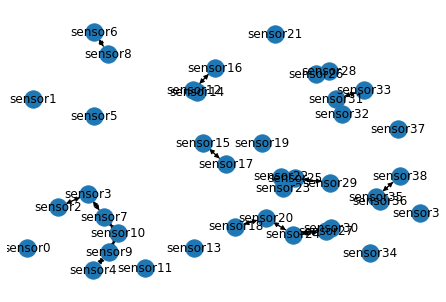

In [112]:
nx.draw(L,nx.get_node_attributes(L,'pos'),with_labels=True)

In [113]:
def distance_pdp_sensors(pdp_positions,sensor,u,v):
    x=pdp_positions[u][0]-sensor[v][0]
    y=pdp_positions[u][1]-sensor[v][1]
    return math.sqrt(x*x+y*y)

## Function that is used for creating the conncectivity graph

In [114]:
def connectivity_graph(pdp_positions,sensor,K):
    J=K
    distance_pdp_each_sensor={}
    k=0
    weight=1
    for i in range(len(pdp_positions)):
        J.add_node('pdp{}'.format(i),pos=pdp_positions[i])
    for u in range(len(pdp_positions)):
        for v in range(len(sensor)):
            euclidean_distance_between_pdp_sensor=distance_pdp_sensors(pdp_positions,sensor,u,v)
            J.add_edge("pdp{}".format(u),"sensor{}".format(v))
            
            if euclidean_distance_between_pdp_sensor<=transmission_range:
                #J.add_edge("pdp{}".format(u),"sensor{}".format(v))
                #if J.has_edge('pdp{}'.format(i),'sensor{}'.format(j))!=True:
                    #J.add_edge("pdp{}".format(u),"sensor{}".format(v))
               
                
                J["pdp{}".format(u)]["sensor{}".format(v)]['weight']=1
                distance_pdp_each_sensor[u,v]=euclidean_distance_between_pdp_sensor,weight
            else:
                J["pdp{}".format(u)]["sensor{}".format(v)]['weight']=100
                distance_pdp_each_sensor[u,v]=euclidean_distance_between_pdp_sensor,100
#            k=k+1
    return distance_pdp_each_sensor,J

In [115]:
distance_between_pdp_to_each_sensor,N=connectivity_graph(pdp_positions,sensor,L)

# Here it finds the shortest distance between each pdp and 

In [116]:
k=0
arc_length={}
shortest_path={}
for i in range(len(pdp_positions)):
    for j in range(len(sensor)):
        if N.has_edge('pdp{}'.format(i),'sensor{}'.format(j)):
            shortest_path[i,j]=nx.shortest_path(N,source='pdp{}'.format(i),target='sensor{}'.format(j),
                                              weight='weight',method='dijkstra')
            arc_length[i,j]=nx.dijkstra_path_length(N,'pdp{}'.format(i),'sensor{}'.format(j))
            
           
        else:
            shortest_path[i,j]=0

In [117]:
new_zipped=dict(zip(arc_length.items(),shortest_path.values()))

In [118]:
def spanning_tree_collecting_time(pdp):
    """This function defines which sensors are connected with the desired pdp"""
    """
    return list
    """
    sensor_subset=[]
    for key,value in new_zipped.items():
        if key[0][0]==pdp:
            if key[1]!=100:
                #print(i)
                sensor_subset.append(key[0][1])
    return sensor_subset

In [119]:
def to_check_the_minimum_hops_between_the_pdp_and_sensor(spanning_tree):
    """In this function we check which sensor can send data to the pdp with minimum hops
    for example if sensor2 is connected with pdp10 with  hop distance with 2 and same sensor2 is connected with 
    pdp11 with hop distance 4 then we assume that sensor2 will send data to the drone when drone is at pdp10 since 
    it has minimum hop distance"""
    subset2=spanning_tree
    for key,value in subset2.items():
        for key1,value1 in subset2.items():
            if key!=key1:
                for i in value:
                    for j in value1:
                        if i==j:
                            #print(i)
                            #s=get_number(i)
                            if nx.dijkstra_path_length(N,'pdp{}'.format(key),'sensor{}'.format(i))>nx.dijkstra_path_length(N,'pdp{}'.format(key1),'sensor{}'.format(i)):
                                subset2[key].remove(i)
                            else:
                                subset2[key1].remove(j)
    return subset2

In [120]:
def create_spanning_tree_for_tour(tour):
    sensor_subset={}
    for i in tour:
        sensor_subset[i]=spanning_tree_collecting_time(i)
    correct_sensor_subset=to_check_the_minimum_hops_between_the_pdp_and_sensor(sensor_subset)
    return correct_sensor_subset

In [121]:
def check_all_sensor_can_send_data(checked_sensor_arc):
    """The main aim of creating this function was to check whether all the sensors are connected to the pdps in the route
    of drone tour.For example we have pdp10 and pdp7 in our route.ie Route=[10 7].We create spanning tree for the both 
    the pdps and check whether all the sensors are connected or not.If all the sensors are not connected in the combined
    spanning tree calculated with the pdps of the Route"""
    s=[]
    for key,values in checked_sensor_arc.items():
        s=list(set().union(s,values))
    if len(s)==len(sensor): # before there was only s==sensor but it was wrong as s is list and sensor is a list of tuple
        return 1
    else:
        return 0
    

In [122]:
def determine_collecting_time(checked_sensor_arc):
    """After checking whether all the sensor can send data while the drone makes a trip in the way as
    described in the Route.We assign collecting time as infinite or call the collecting time function"""
    value=check_all_sensor_can_send_data(checked_sensor_arc)
    if value==1:
        t_collecting=calculate_collecting_time(checked_sensor_arc)
    if value==0:
        t_collecting=math.inf
    return t_collecting

In [123]:
def check_all_sensor_can_send_data(checked_sensor_arc):
    """The main aim of creating this function was to check whether all the sensors are connected to the pdps in the route
    of drone tour.For example we have pdp10 and pdp7 in our route.ie Route=[10 7].We create spanning tree for the both 
    the pdps and check whether all the sensors are connected or not.If all the sensors are not connected in the combined
    spanning tree calculated with the pdps of the Route"""
    s=[]
    for key,values in checked_sensor_arc.items():
        s=list(set().union(s,values))
    if len(s)==len(sensor): # before there was only s==sensor but it was wrong as s is list and sensor is a list of tuple
        return 1
    else:
        return 0
    

In [124]:
def calculate_collecting_time(checked_sensor_arc):
    
    dict_={}
    for key,values in checked_sensor_arc.items():
        weight=0
        if values!=[]:
            for j in values:
                for key1,values1 in new_zipped.items():
                    if key1[0]==(key,j):
                        #print(key1[1])
                        weight=weight+key1[1]
                        t_collecting=(data_rate/bandwidth)*weight
        dict_[key]=t_collecting
    return dict_
    

In [125]:
def calc_cluster_number(sensor):
    
    for i in range(1,len(sensor)):
        new_dict={}
        kmeans=KMeans(n_clusters=i,random_state=1000)
        kmeans.fit(X)
        c_centers=tuple(kmeans.cluster_centers_)
        for j in c_centers:
            temp={}
            for p,value in pdp_positions.items():
                arr=np.array(value)
                dist=np.linalg.norm(j-arr)
                temp[p]=dist
#           print(temp)
            new_dict[tuple(j)]=min(temp.items(),key=operator.itemgetter(1))[0]
        subset={}
        print(new_dict)
        for key,values in new_dict.items():
            subset[values]=spanning_tree_collecting_time(values)
        checked=to_check_the_minimum_hops_between_the_pdp_and_sensor(subset)
        check=check_all_sensor_can_send_data(checked)
        if check==1:
            print("i am here")
            df_=calculate_collecting_time(checked)
            print(df_)
            break
    return i,new_dict,df_
        
        
            

In [126]:
%%time
n,m,o=calc_cluster_number(sensor)

{(551.2249999999999, 461.325): 47}
{(214.30769230769232, 379.38461538461536): 25, (713.4444444444445, 500.7777777777777): 59}
{(762.5, 400.19999999999993): 58, (230.33333333333343, 186.44444444444446): 23, (429.63636363636374, 797.3636363636365): 39}
{(230.33333333333343, 186.44444444444446): 23, (767.625, 739.875): 60, (321.87500000000006, 768.875): 27, (750.6666666666667, 313.66666666666663): 57}
{(230.33333333333343, 186.44444444444446): 23, (790.1428571428571, 767.0): 71, (596.125, 410.0): 47, (841.0, 280.7777777777777): 68, (301.00000000000006, 799.8571428571429): 28}
{(230.33333333333343, 186.44444444444446): 23, (815.1666666666667, 732.8333333333333): 71, (596.125, 410.0): 47, (841.0, 280.7777777777777): 68, (508.5, 829.25): 50, (178.25, 813.5): 17}
{(508.5, 829.25): 50, (709.5, 207.83333333333331): 56, (230.33333333333343, 186.44444444444446): 23, (815.1666666666667, 732.8333333333333): 71, (895.4000000000001, 354.4): 69, (178.25, 813.5): 17, (600.6666666666666, 464.66666666666

In [127]:
coordinates=[]
for key,values in o.items():
    for k,v in pdp_positions.items():
        if key==k:
            l=list(v)
            coordinates.append(l)
    

In [128]:
coordinates

[[282.842712474619, 282.842712474619],
 [989.9494936611666, 565.685424949238],
 [141.4213562373095, 707.1067811865476],
 [707.1067811865476, 424.26406871192853],
 [707.1067811865476, 848.5281374238571],
 [707.1067811865476, 141.4213562373095],
 [989.9494936611666, 282.842712474619],
 [424.26406871192853, 848.5281374238571],
 [282.842712474619, 989.9494936611666],
 [565.685424949238, 282.842712474619],
 [141.4213562373095, 282.842712474619],
 [565.685424949238, 565.685424949238],
 [707.1067811865476, 989.9494936611666],
 [848.5281374238571, 424.26406871192853],
 [848.5281374238571, 707.1067811865476],
 [282.842712474619, 141.4213562373095],
 [0.0, 141.4213562373095],
 [0.0, 707.1067811865476],
 [848.5281374238571, 141.4213562373095],
 [424.26406871192853, 141.4213562373095]]

In [129]:
coordinates=[[0,0]]+coordinates

In [130]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from gurobipy import *

In [131]:
M=1000*1000

In [132]:
n = len(coordinates)

In [133]:
n

21

In [134]:
L=15

In [135]:
coordinates=np.array(coordinates)

In [136]:
depot, customers = coordinates[0, :], coordinates[1:, :]

In [137]:
no_of_vehicles=3

set minimum number of customers to be visited by each drone

In [138]:
K=6

In [139]:
K

6

In [140]:
dist_matrix = np.empty([n, n])

In [141]:
m = Model("MVRP")

In [142]:
for i in range(n):
    for j in range(n):
        dist_matrix[i, j] = np.sqrt((coordinates[i][0] - coordinates[j][0]) ** 2 + (coordinates[i][1] - coordinates[j][1]) ** 2)
        if i==j:
            dist_matrix[i,j]=M
        continue

In [143]:
x={}

In [144]:
for i in range(n):
    for j in range(n):
        x[i, j] = m.addVar(vtype=GRB.BINARY, name="x%d,%d" % (i, j))
m.update()

In [145]:
for i in range(n):
    x[i, i].ub = 0

In [146]:
u_vars = {}
for i in range(n):
    u_vars[i] = m.addVar(lb=0, ub=L, vtype=gurobipy.GRB.INTEGER, name='u' + str(i))
m.update()

In [147]:
m.addConstr(gurobipy.quicksum(x[0, i] for i in range(1, n)) == no_of_vehicles)
m.addConstr(gurobipy.quicksum(x[i, 0] for i in range(1, n)) == no_of_vehicles)

<gurobi.Constr *Awaiting Model Update*>

In [148]:
for i in range(1, n):
    m.addConstr(gurobipy.quicksum(x[i, j] for j in range(n) if i != j) == 1)

In [149]:
for j in range(1, n):
    m.addConstr(gurobipy.quicksum(x[i, j] for i in range(n) if i != j) == 1)

In [150]:
for i in range(1, n):
    m.addConstr(u_vars[i] + (L - 2) * x[0, i] - x[i, 0] <= L - 1)

In [151]:
for i in range(1, n):
    m.addConstr(u_vars[i] + x[0, i] + (2 - K) * x[i, 0] >= 2)

In [152]:
for i in range(1, n):
    m.addConstr(x[0, i] + x[i, 0] <= 1)

In [153]:
for i in range(1, n):
    for j in range(1, n):
        if i != j:
            m.addConstr(u_vars[i] - u_vars[j] + L * x[i, j] + (L - 2) * x[j, i] <= L - 1)
m.update()

In [154]:
%%time
m._vars = x
m._uvars = u_vars
# m.params.OutputFlag = int(kwargs.get('output_flag', 0))
# m.params.TimeLimit = float(kwargs.get('time_limit', 60.0))
m.setObjective(quicksum(quicksum(x[(i, j)]*dist_matrix[(i, j)] for j in range(n)) for i in range(n)),GRB.MINIMIZE)
m.optimize()

Gurobi Optimizer version 9.5.0 build v9.5.0rc5 (win64)
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads
Optimize a model with 482 rows, 462 columns and 2520 nonzeros
Model fingerprint: 0xf4ada5d6
Variable types: 0 continuous, 462 integer (441 binary)
Coefficient statistics:
  Matrix range     [1e+00, 2e+01]
  Objective range  [1e+02, 1e+06]
  Bounds range     [1e+00, 2e+01]
  RHS range        [1e+00, 1e+01]
Found heuristic solution: objective 13651.756376
Presolve removed 0 rows and 22 columns
Presolve time: 0.01s
Presolved: 482 rows, 440 columns, 2520 nonzeros
Variable types: 0 continuous, 440 integer (420 binary)

Root relaxation: objective 5.792024e+03, 131 iterations, 0.00 seconds (0.00 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0 5792.02365    0   53 13651.7564 5792.02365  57.6%     -    0s
H    0     0                    11

In [155]:
print('\n minimum distance: %g' % m.objVal)


 minimum distance: 7073.38


In [156]:
m.printAttr('x')


    Variable            x 
-------------------------
        x0,4            1 
       x0,12            1 
       x0,17            1 
       x1,10            1 
        x2,7            1 
       x3,18            1 
       x4,14            1 
       x5,13            1 
        x6,0            1 
       x7,19            1 
        x8,9            1 
        x9,3            1 
      x10,20            1 
       x11,1            1 
      x12,15            1 
       x13,8            1 
       x14,2            1 
       x15,5            1 
       x16,0            1 
      x17,11            1 
       x18,0            1 
       x19,6            1 
      x20,16            1 
          u1            3 
          u2            3 
          u3            7 
          u4            1 
          u5            3 
          u6            6 
          u7            4 
          u8            5 
          u9            6 
         u10            4 
         u11            2 
         u12            1 
 

In [157]:
from_node = []
to_node = np.empty([n, n])

In [158]:
for v in m.getVars():
    from_node.append(v.x)

In [159]:
for i in range(n):
    for j in range(n):
        to_node[i, j] = from_node[n * i + j]

In [160]:
print('\nDistance Matrix (dij):\n', pd.DataFrame(dist_matrix).astype('int64'))
print('\nDecision (Xij):\n', pd.DataFrame(to_node).astype('int64'))


Distance Matrix (dij):
          0        1        2        3        4        5        6        7   \
0   1000000      400     1140      721      824     1104      721     1029   
1       400  1000000      761      447      447      707      447      707   
2      1140      761  1000000      860      316      400      509      282   
3       721      447      860  1000000      632      583      800      948   
4       824      447      316      632  1000000      424      282      316   
5      1104      707      400      583      424  1000000      707      632   
6       721      447      509      800      282      707  1000000      316   
7      1029      707      282      948      316      632      316  1000000   
8       948      583      632      316      509      282      761      800   
9      1029      707      824      316      707      447      948     1000   
10      632      282      509      600      200      583      200      424   
11      316      141      894      424 

In [161]:
# to node:Decision matrix
I = []  #Row of decision matrix
J = [] 
for i in range(n):
    for j in range(n):
        if to_node[i, j] > 0.5:
            I.append(i)
            J.append(j)

In [162]:
print(np.array(I))
print(np.array(J))

[ 0  0  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20]
[ 4 12 17 10  7 18 14 13  0 19  9  3 20  1 15  8  2  5  0 11  0  6 16]


In [163]:
all_routes = {}
cnt = 0

In [164]:
for i in range(no_of_vehicles):
    end = J[i]  # Take out the J[0] of (0,J[0])
    route = [0, end]  # Initial route=[0,J[0]]
    while end != 0:
        start_index = I.index(end)  # (# Find the index corresponding to J[0] in I[], which is the start_index of the next value)
        end = J[start_index]  # (# Put this index, to J[] to find the corresponding value,)
        route.append(end)  #  (Add the value to the sub-route list route)
    all_routes[str(i)] = route  # (Multiple sub-paths constitute the total path expression)
    # Output all_routes, including each sub-route
print('all sub route trace:')
print(all_routes)

all sub route trace:
{'0': [0, 4, 14, 2, 7, 19, 6, 0], '1': [0, 12, 15, 5, 13, 8, 9, 3, 18, 0], '2': [0, 17, 11, 1, 10, 20, 16, 0]}


In [165]:
# sub_route_total_distance = {}

# for i in range(no_of_vehicles):
#     prev_index = 0
#     # print('\n')
#     sub_route_total_distance[i] = 0
#     for j in range(len(all_routes[str(i)])):
#         cur_index = all_routes[str(i)][j]
#         # print('dist[%d,%d]=%d' % (prev_index, cur_index, dist_matrix[prev_index][cur_index]))
#         sub_route_total_distance[i] += dist_matrix[prev_index][cur_index]
#         prev_index = cur_index
# print('all sub route total distance sum:')
# print(sub_route_total_distance)


In [166]:
X=[]
Y=[]
for i,value in enumerate (coordinates):
    X.append(coordinates[i][0])
    Y.append(coordinates[i][1])

Text(0.5, 1.0, 'Original sensors and chargers positions')

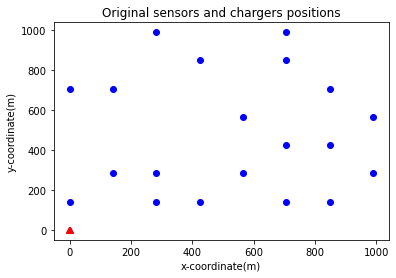

In [167]:
# Figure 1 Original WRSN sensor node and charger Wireless radar sensor network
plt.figure()
plt.scatter(X[1:], Y[1:], marker='o', color='blue')
plt.scatter(X[0], Y[0], marker='^', color='blue')
plt.xlabel('x-coordinate(m)')
plt.ylabel('y-coordinate(m)')
for i in range(no_of_vehicles):
    plt.scatter(X[0] - 2 + i, Y[0] - 1, marker='^', color='red')
plt.title('Original sensors and chargers positions')


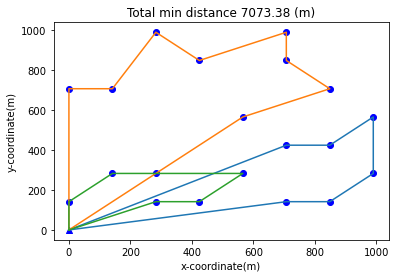

In [168]:
# Figure 2 Trajectory after MTSP solution
plt.figure()
plt.scatter(X[1:], Y[1:], marker='o', color='blue')
plt.scatter(X[0], Y[0], marker='^', color='blue')
plt.xlabel('x-coordinate(m)')
plt.ylabel('y-coordinate(m)')
plt.title('Total min distance %g (m)' % m.objVal)
# plt.plot([XX1, XX2], [YY1, YY2])
for index in all_routes:
    route_list = all_routes[index]
    x = []
    y = []
    for i in route_list:
        x.append(X[i])
        y.append(Y[i])
    plt.plot(x, y)
plt.show()

In [169]:
def calculate_collecting_time_each(lis):
    """function will get the list of index of customer in each subtour
    -then we compare the values of total instance. This total has the coordinates of depot and the pdps near to the clustr
        center
    -we then append the keys of the pdp_position instance so we get the index of pdps where the sensors are connected and collection time should be calculated
    """
    new_list=[]
    subset={}
    for val in lis:
        for keys,v in pdp_positions.items():
            if v == tuple(coordinates[val]):
                new_list.append(keys)
    print("#####")            
    print(new_list)
    for values in new_list:
        subset[values]=spanning_tree_collecting_time(values)
    checked=to_check_the_minimum_hops_between_the_pdp_and_sensor(subset)
    collect_time=calculate_collecting_time(checked)
    
    return collect_time


In [170]:
def calculate_total_collecting_time(subtour): 
    """
    This function is used to calculate the total collecting time
    """
    total_col={}
    for key , values in subtour.items():
        xx=values[1:len(values)-1]
        print(values[1:len(values)-1])
        total_col[key]=calculate_collecting_time_each(xx)
    totally=0
    each_total={}
    for key,val in total_col.items():
        temp=0
        for v,k in val.items():
            temp=temp+k
            totally=totally+k
        each_total[key]=temp 
    return totally,each_total



In [171]:
total_collect_time,each_total=calculate_total_collecting_time(all_routes)

[4, 14, 2, 7, 19, 6]
#####
[58, 69, 81, 79, 67, 56]
[12, 15, 5, 13, 8, 9, 3, 18]
#####
[48, 71, 61, 62, 39, 29, 16, 5]
[17, 11, 1, 10, 20, 16]
#####
[1, 13, 24, 46, 34, 23]


In [172]:
each_total

{'0': 50.0, '1': 52.5, '2': 50.0}

In [173]:
total_collect_time

152.5

In [174]:
all_routes

{'0': [0, 4, 14, 2, 7, 19, 6, 0],
 '1': [0, 12, 15, 5, 13, 8, 9, 3, 18, 0],
 '2': [0, 17, 11, 1, 10, 20, 16, 0]}

In [186]:
def calc_trip_time(allroute):
    """
    This function is used to calculate the trip time of each drone . The all_routes dictionary has tour for each 
    drone.
    """
    new_dict={}
    for key,values in allroute.items():
        total=0
        for i in range(len(values)):
            if i<len(values)-1:
                total=total+dist_matrix[values[i],values[i+1]]
        new_dict[key]=total
    temp={}
    for k,v in new_dict.items():
        temp[k]=v/drone_speed
    
    return temp
            
        
    

In [187]:
trip_length=calc_trip_time(all_routes)

In [188]:
trip_length

{'0': 837.1389350551893, '1': 1046.21093057056, '2': 474.44484906779513}

In [189]:
from collections import Counter

In [190]:
total_time_dict=dict(Counter(each_total)+Counter(trip_length))

In [191]:
total_time_dict

{'0': 887.1389350551893, '1': 1098.71093057056, '2': 524.4448490677951}

so the makespan will be 1098.71 seconds

this will be the total time required to collect by the 3 drones in the grid